In [1]:
import pickle
from scipy.sparse import csr_matrix
from clustering import visualize_silhouette_clusters, compare_true_labels
import numpy as np
from kmodes.kmodes import KModes
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics.pairwise import cosine_distances
from soyclustering import SphericalKMeans, visualize_pairwise_distance
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
from sklearn.datasets import fetch_20newsgroups

with open('data/mnist/minsupp_0.26/itemset_features.pkl', 'rb') as f:
    itemset_features = pickle.load(f)
    
with open('data/mnist_labels.pkl', 'rb') as f:
    true_labels = pickle.load(f)
    
print("num of groundtruth labels:", len(np.unique(true_labels)))

num of groundtruth labels: 10


In [2]:
subsample_indices = np.random.choice(len(itemset_features),5000,replace=False)
itemset_features = itemset_features[subsample_indices]
true_labels = true_labels[subsample_indices]

In [3]:
# adjust number of clusters
my_num_clusters = 10

# convert itemset_features to a sparse matrix that SphericalKMeans will accept
itemset_matrix = csr_matrix(itemset_features.astype(int))
density = itemset_matrix.getnnz() / np.prod(itemset_matrix.shape)
print("density of matrix:", density)

spherical_kmeans = SphericalKMeans(
        n_clusters=my_num_clusters,
        max_iter=100,
        verbose=1,
        init='similar_cut',
        #sparsity='minimum_df',
        minimum_df_factor=0.05
    )

sphkmeans_cluster_labels = spherical_kmeans.fit_predict(itemset_matrix)
print('finished spherical clustering')

compare_true_labels(true_labels, sphkmeans_cluster_labels, itemset_features)

density of matrix: 0.2946737226277372
initialization_time=0.002001 sec, sparsity=0.285
n_iter=1, changed=4481, inertia=2721.887, iter_time=1.321 sec, sparsity=0.894
n_iter=2, changed=1313, inertia=1781.268, iter_time=1.330 sec, sparsity=0.921
n_iter=3, changed=613, inertia=1741.170, iter_time=1.329 sec, sparsity=0.958
n_iter=4, changed=380, inertia=1722.497, iter_time=1.303 sec, sparsity=0.975
n_iter=5, changed=245, inertia=1716.162, iter_time=1.320 sec, sparsity=0.983
n_iter=6, changed=221, inertia=1712.826, iter_time=1.348 sec, sparsity=0.986
n_iter=7, changed=202, inertia=1709.797, iter_time=1.364 sec, sparsity=0.987
n_iter=8, changed=198, inertia=1706.594, iter_time=1.342 sec, sparsity=0.988
n_iter=9, changed=178, inertia=1703.485, iter_time=1.312 sec, sparsity=0.99
n_iter=10, changed=172, inertia=1700.909, iter_time=1.540 sec, sparsity=0.991
n_iter=11, changed=170, inertia=1698.157, iter_time=1.460 sec, sparsity=0.991
n_iter=12, changed=171, inertia=1695.580, iter_time=1.501 sec, 

In [4]:
%%script false --no-raise-error

# KModes clustering

km = KModes(n_clusters=my_num_clusters, init='Huang', n_init=5, verbose=1, n_jobs=-1)
kmodes_cluster_labels = km.fit_predict(itemset_features)

compare_true_labels(true_labels, kmodes_cluster_labels, itemset_features)


Couldn't find program: 'false'


In [5]:
%%script false --no-raise-error

# Agglomerative clustering

distances = cosine_distances(itemset_features)

agglo_clustering = AgglomerativeClustering(n_clusters=my_num_clusters, metric="precomputed", linkage="average")
agglo_labels = agglo_clustering.fit_predict(distances)

compare_true_labels(true_labels, agglo_labels, itemset_features)



Couldn't find program: 'false'


In [6]:
## RANDOM VISUALIZATION STUFF BELOW

For n_clusters = 10 The average silhouette_score is : 0.09200853506969427


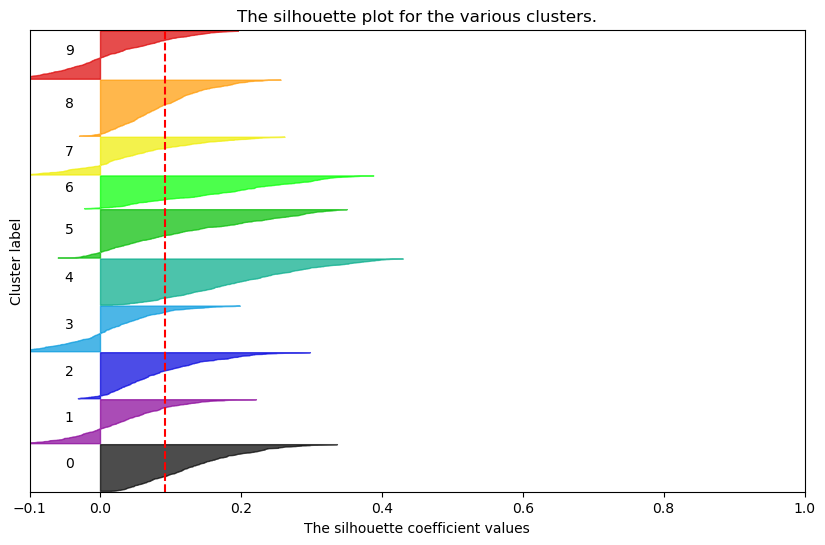

In [7]:
## Silhouette plot to visualize how good clusters are: if they are good, should see more on the right side
## Good average silhouette score apparently should be >0.5?

visualize_silhouette_clusters(sphkmeans_cluster_labels, itemset_features, metric='cosine')

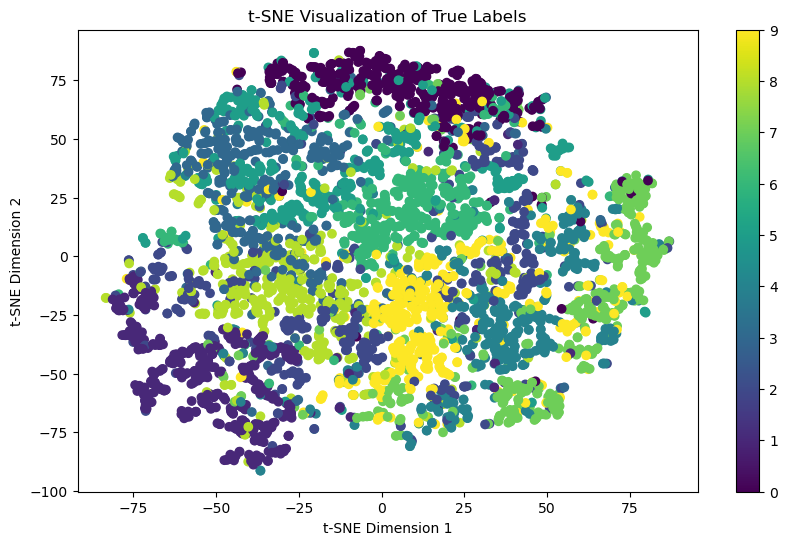

In [9]:
## using t-sne (alternative to pca) to visualize TRUE LABELS

# # Calculate cosine distances between binary vectors
# cosine_distances_matrix = cosine_distances(itemset_features)

# # Create a t-SNE instance with cosine distance
# tsne = TSNE(n_components=2, metric="precomputed", perplexity=10, learning_rate=100, init="random")

tsne = TSNE(n_components=2, metric="cosine", perplexity=10, learning_rate=100, init="random", n_jobs=-1)

# Fit t-SNE to the cosine distance matrix
tsne_results = tsne.fit_transform(itemset_features)#cosine_distances_matrix)

# Create a scatter plot to visualize the results
plt.figure(figsize=(10, 6))


plt.scatter(tsne_results[:, 0], tsne_results[:, 1], c=true_labels, cmap='viridis')
plt.colorbar()
plt.title('t-SNE Visualization of True Labels')
plt.xlabel('t-SNE Dimension 1')
plt.ylabel('t-SNE Dimension 2')
plt.show()


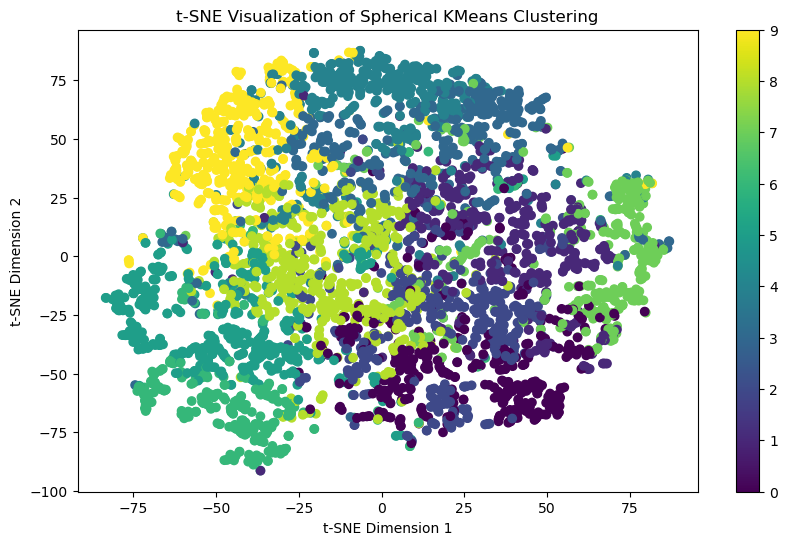

In [10]:
## using t-sne (alternative to pca) to visualize SPHKMEANS clusters

# Create a scatter plot to visualize the results
plt.figure(figsize=(10, 6))
plt.scatter(tsne_results[:, 0], tsne_results[:, 1], c=sphkmeans_cluster_labels, cmap='viridis')
plt.colorbar()
plt.title('t-SNE Visualization of Spherical KMeans Clustering')
plt.xlabel('t-SNE Dimension 1')
plt.ylabel('t-SNE Dimension 2')
plt.show()


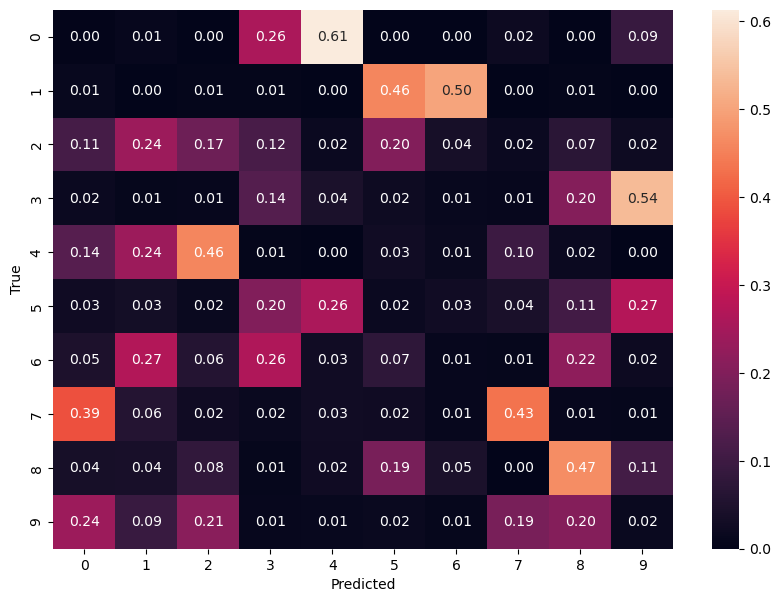

In [11]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns
import numpy as np

# true_labels = [... your true labels ...]
# predicted_labels = [... your predicted labels ...]

# Calculate the confusion matrix
cm = confusion_matrix(true_labels, sphkmeans_cluster_labels, normalize='true')

# Plotting the confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt=".2f")
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

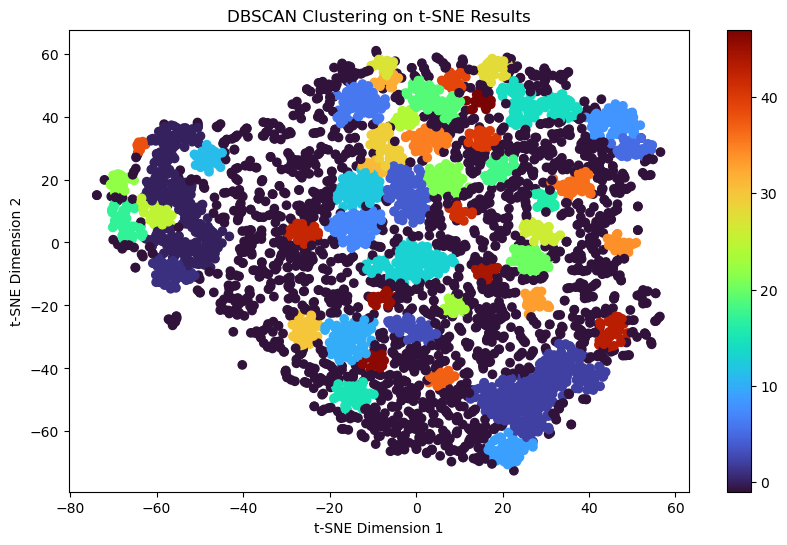

Adjusted Rand Index: 0.08820547991459927
Normalized Mutual Information: 0.3929283166715339
Homogeneity: 0.3681151662201577
Completeness: 0.4213283521806275
V-Measure: 0.392928316671534
Silhouette Score: 0.030942257013738105


In [10]:
from sklearn.cluster import DBSCAN

# Apply DBSCAN to the t-SNE results
dbscan = DBSCAN(eps=3, min_samples=20)
dbscan_labels = dbscan.fit_predict(tsne_results)

# Create a scatter plot to visualize the DBSCAN clustering results
plt.figure(figsize=(10, 6))
plt.scatter(tsne_results[:, 0], tsne_results[:, 1], c=dbscan_labels, cmap='turbo')
plt.colorbar()
plt.title('DBSCAN Clustering on t-SNE Results')
plt.xlabel('t-SNE Dimension 1')
plt.ylabel('t-SNE Dimension 2')
plt.show()

compare_true_labels(dbscan_labels, true_labels, itemset_features)


In [11]:
## SPH KMEANS MORE IDEA

In [12]:
# adjust number of clusters
increased_num_clusters = 3

# convert itemset_features to a sparse matrix that SphericalKMeans will accept
itemset_matrix = csr_matrix(itemset_features.astype(int))
density = itemset_matrix.getnnz() / np.prod(itemset_matrix.shape)
print("density of matrix:", density)

spherical_kmeans = SphericalKMeans(
        n_clusters=increased_num_clusters,
        max_iter=100,
        verbose=1,
        init='similar_cut',
        #sparsity='minimum_df',
        minimum_df_factor=0.05
    )

increased_sphkmeans_cluster_labels = spherical_kmeans.fit_predict(itemset_matrix)
print('finished spherical clustering')

compare_true_labels(true_labels, increased_sphkmeans_cluster_labels, itemset_features)

density of matrix: 0.29907599351175995
initialization_time=0.001998 sec, sparsity=0.48
n_iter=1, changed=2965, inertia=3246.214, iter_time=1.275 sec, sparsity=0.682
n_iter=2, changed=428, inertia=2147.785, iter_time=1.277 sec, sparsity=0.89
n_iter=3, changed=631, inertia=2076.015, iter_time=1.263 sec, sparsity=0.994
n_iter=4, changed=540, inertia=1990.370, iter_time=1.279 sec, sparsity=1.0
n_iter=5, changed=309, inertia=1963.803, iter_time=1.269 sec, sparsity=1.0
n_iter=6, changed=161, inertia=1957.911, iter_time=1.276 sec, sparsity=1.0
n_iter=7, changed=81, inertia=1956.363, iter_time=1.267 sec, sparsity=1.0
n_iter=8, changed=50, inertia=1956.026, iter_time=1.283 sec, sparsity=1.0
n_iter=9, changed=30, inertia=1955.894, iter_time=1.275 sec, sparsity=1.0
n_iter=10, changed=17, inertia=1955.775, iter_time=1.275 sec, sparsity=1.0
n_iter=11, changed=13, inertia=1955.749, iter_time=1.290 sec, sparsity=1.0
n_iter=12, changed=7, inertia=1955.726, iter_time=1.269 sec, sparsity=1.0
n_iter=13, 

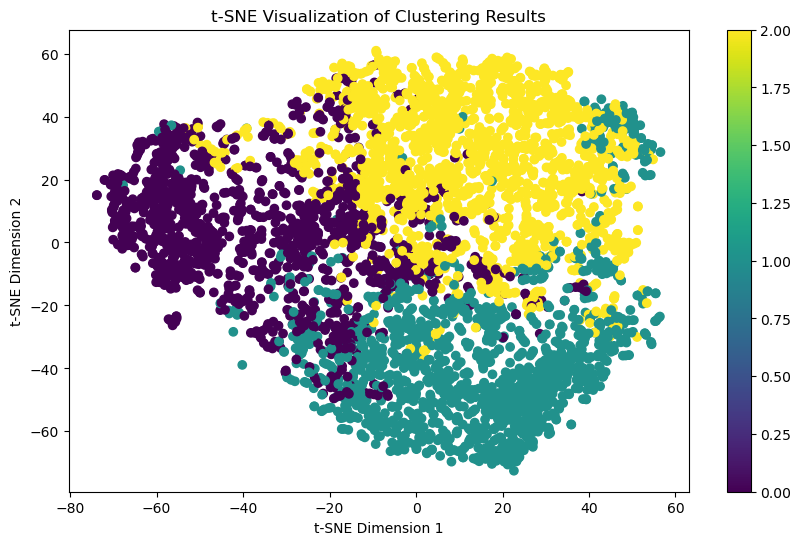

In [13]:
plt.figure(figsize=(10, 6))
plt.scatter(tsne_results[:, 0], tsne_results[:, 1], c=increased_sphkmeans_cluster_labels, cmap='viridis')
plt.colorbar()
plt.title('t-SNE Visualization of Clustering Results')
plt.xlabel('t-SNE Dimension 1')
plt.ylabel('t-SNE Dimension 2')
plt.show()

initialization_time=0.002005 sec, sparsity=0.618
n_iter=1, changed=4471, inertia=2612.303, iter_time=1.298 sec, sparsity=0.991
n_iter=2, changed=355, inertia=2182.731, iter_time=1.268 sec, sparsity=1.0
n_iter=3, changed=223, inertia=2161.252, iter_time=1.269 sec, sparsity=1.0
n_iter=4, changed=184, inertia=2153.839, iter_time=1.270 sec, sparsity=1.0
n_iter=5, changed=139, inertia=2149.398, iter_time=1.268 sec, sparsity=1.0
n_iter=6, changed=136, inertia=2146.836, iter_time=1.262 sec, sparsity=1.0
n_iter=7, changed=133, inertia=2144.301, iter_time=1.275 sec, sparsity=1.0
n_iter=8, changed=152, inertia=2141.482, iter_time=1.267 sec, sparsity=1.0
n_iter=9, changed=139, inertia=2137.781, iter_time=1.293 sec, sparsity=1.0
n_iter=10, changed=137, inertia=2134.788, iter_time=1.299 sec, sparsity=1.0
n_iter=11, changed=147, inertia=2131.918, iter_time=1.291 sec, sparsity=1.0
n_iter=12, changed=138, inertia=2128.665, iter_time=1.301 sec, sparsity=1.0
n_iter=13, changed=148, inertia=2125.488, ite

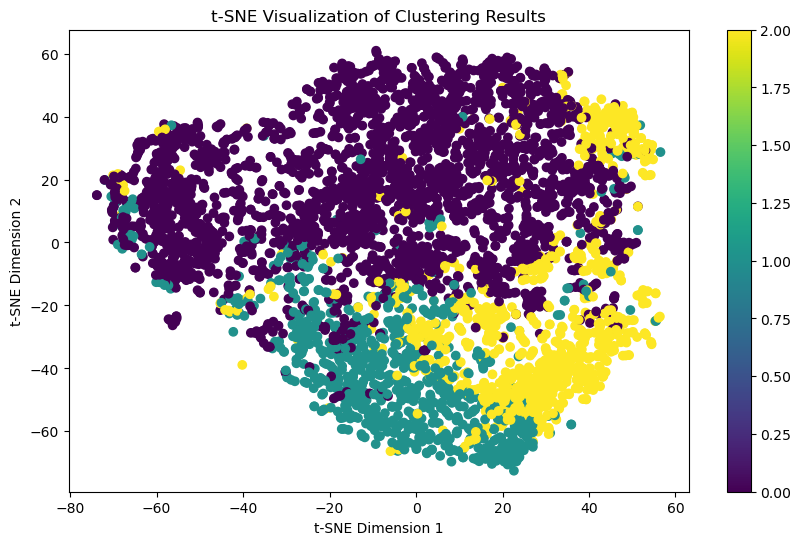

In [14]:
# BISECTING SPHERICAL K MEANS

from sklearn.metrics.pairwise import cosine_similarity
from scipy.sparse import csr_matrix
from sklearn.cluster import KMeans
import numpy as np

# Function to compute intra-cluster variance
def intra_cluster_variance(cluster_data):
    if len(cluster_data) < 2:
        return 0
    centroid = np.mean(cluster_data, axis=0)
    variance = np.mean(np.square(cosine_similarity(cluster_data, centroid.reshape(1, -1)) - 1))
    return variance

# Initialization
n_clusters = increased_num_clusters
clusters = [csr_matrix(itemset_features)]
final_labels = np.zeros(len(itemset_features), dtype=int)

# Bisecting step
while len(clusters) < n_clusters:
    highest_variance = 0
    cluster_to_split = None
    cluster_index = -1

    # Find the cluster with the highest intra-cluster variance
    for i, cluster in enumerate(clusters):
        variance = intra_cluster_variance(cluster.toarray())
        if variance > highest_variance:
            highest_variance = variance
            cluster_to_split = cluster
            cluster_index = i

    # Perform spherical k-means on the cluster with the highest variance
    spherical_kmeans = SphericalKMeans(
        n_clusters=2,
        max_iter=100,
        verbose=1,
        init='similar_cut',
        minimum_df_factor=0.05
    )

    sub_cluster_labels = spherical_kmeans.fit_predict(cluster_to_split)

    # Replace the original cluster with the two new sub-clusters
    clusters.pop(cluster_index)
    for new_cluster_index in [0, 1]:
        new_cluster_data = cluster_to_split.toarray()[sub_cluster_labels == new_cluster_index, :]
        clusters.append(csr_matrix(new_cluster_data))

    # Update labels
    original_indices = np.where(final_labels == cluster_index)[0]
    final_labels[original_indices[sub_cluster_labels == 1]] = len(clusters) - 1
    final_labels[original_indices[sub_cluster_labels == 0]] = cluster_index

# At this point, `labels` contains the cluster assignments for each data point

compare_true_labels(true_labels, final_labels, itemset_features)
print(np.unique(final_labels))

plt.figure(figsize=(10, 6))
plt.scatter(tsne_results[:, 0], tsne_results[:, 1], c=final_labels, cmap='viridis')
plt.colorbar()
plt.title('t-SNE Visualization of Clustering Results')
plt.xlabel('t-SNE Dimension 1')
plt.ylabel('t-SNE Dimension 2')
plt.show()

In [15]:
# KModes clustering

km = KModes(n_clusters=increased_num_clusters, init='Huang', n_init=5, verbose=1, n_jobs=-1)
kmodes_cluster_labels = km.fit_predict(itemset_features)

compare_true_labels(true_labels, kmodes_cluster_labels, itemset_features)

Best run was number 5
Adjusted Rand Index: 0.029235814147752465
Normalized Mutual Information: 0.10416035997392381
Homogeneity: 0.07212424274072987
Completeness: 0.18739931068387958
V-Measure: 0.10416035997392381
Silhouette Score: -0.008543909547488189


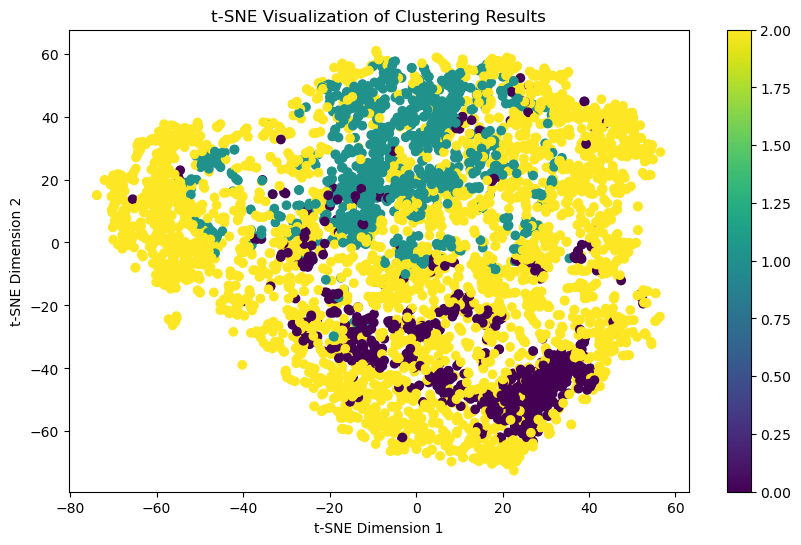

In [16]:
plt.figure(figsize=(10, 6))
plt.scatter(tsne_results[:, 0], tsne_results[:, 1], c=kmodes_cluster_labels, cmap='viridis')
plt.colorbar()
plt.title('t-SNE Visualization of Clustering Results')
plt.xlabel('t-SNE Dimension 1')
plt.ylabel('t-SNE Dimension 2')
plt.show()

In [17]:
from sklearn.cluster import BisectingKMeans

distances = cosine_distances(itemset_features)

bisecting_clustering = BisectingKMeans(n_clusters=increased_num_clusters, m
agglo_clustering = AgglomerativeClustering(n_clusters=increased_num_clusters, metric="precomputed", linkage="average")
agglo_labels = agglo_clustering.fit_predict(distances)

compare_true_labels(true_labels, agglo_labels, itemset_features)

SyntaxError: '(' was never closed (3537600470.py, line 5)

In [ ]:
## REMOVE OUTLIERS IDEA

In [ ]:
# Filter out the outlier points
outlier_points = tsne_results[dbscan_labels == -1]

# Create a scatter plot for the outliers
plt.figure(figsize=(10, 6))
plt.scatter(outlier_points[:, 0], outlier_points[:, 1], color='red')
plt.title('Outliers Identified by DBSCAN')
plt.xlabel('t-SNE Dimension 1')
plt.ylabel('t-SNE Dimension 2')
plt.show()

In [ ]:
outlier_index = np.where(dbscan_labels==-1)

filtered_data = np.delete(itemset_features, outlier_index, axis=0)
filtered_labels = np.delete(true_labels, outlier_index, axis=0)
print(len(filtered_labels), len(true_labels))

# convert itemset_features to a sparse matrix that SphericalKMeans will accept
filtered_itemset_matrix = csr_matrix(filtered_data.astype(int))

spherical_kmeans = SphericalKMeans(
        n_clusters=11,
        max_iter=100,
        verbose=0,
        init='similar_cut',
        #sparsity='minimum_df',
        minimum_df_factor=0.05
    )

for i in range(10):
    try:

        filtered_sphkmeans_cluster_labels = spherical_kmeans.fit_predict(filtered_itemset_matrix)
        print('\nRun #' + str(i+1))

        compare_true_labels(filtered_labels, filtered_sphkmeans_cluster_labels, filtered_data)
    except:
        continue

In [ ]:
## using t-sne (alternative to pca) to visualize filtered true clusters

# Calculate cosine distances between binary vectors
cosine_distances_matrix = cosine_distances(filtered_data)

# Create a t-SNE instance with cosine distance
tsne = TSNE(n_components=2, metric="precomputed", perplexity=30, learning_rate=200, init="random")

# Fit t-SNE to the cosine distance matrix
tsne_results = tsne.fit_transform(cosine_distances_matrix)

# Create a scatter plot to visualize the results
plt.figure(figsize=(10, 6))


plt.scatter(tsne_results[:, 0], tsne_results[:, 1], c=filtered_labels, cmap='viridis')
plt.colorbar()
plt.title('t-SNE Visualization of Filtered True Labels')
plt.xlabel('t-SNE Dimension 1')
plt.ylabel('t-SNE Dimension 2')
plt.show()


In [ ]:
## using t-sne (alternative to pca) to visualize filtered SPHKMEANS clusters

# Create a scatter plot to visualize the results
plt.figure(figsize=(10, 6))

plt.scatter(tsne_results[:, 0], tsne_results[:, 1], c=filtered_sphkmeans_cluster_labels, cmap='viridis')
plt.colorbar()
plt.title('t-SNE Visualization of Filtered Spherical KMeans')
plt.xlabel('t-SNE Dimension 1')
plt.ylabel('t-SNE Dimension 2')
plt.show()


In [ ]:
## PCA IDEA

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Normalizing the data
scaler = StandardScaler()
normalized_features = scaler.fit_transform(itemset_features)
print(len(normalized_features))

# Performing PCA
pca_3d = PCA(n_components=3)
pca_features_3d = pca_3d.fit_transform(normalized_features)

# Plotting the PCA transformed vectors in 3D
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')

for label in np.unique(true_labels):
    indices = np.where(true_labels == label)
    ax.scatter(pca_features_3d[indices, 0], pca_features_3d[indices, 1], pca_features_3d[indices, 2], label=label, s=1)

ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
ax.set_zlabel('Principal Component 3')
ax.set_title('3D PCA of Transformed Vectors')
ax.legend()

plt.show()

In [ ]:
print(sum(pca_3d.explained_variance_ratio_))

In [ ]:
# function included with the sphericalkmeans library to evaluate the distance between the clusters
# dark means closer, light means further away - think ideally should have more light squares?

sphkmeans_centers = spherical_kmeans.cluster_centers_

fig = visualize_pairwise_distance(centers=sphkmeans_centers,
                                  labels=sphkmeans_cluster_labels, 
                                  max_dist=1, 
                                  sort=False)

In [ ]:
# extra

#agglomerative clustering

# from sklearn.metrics.pairwise import cosine_similarity
# Compute the cosine similarity matrix
# similarity = cosine_similarity(itemset_features)
# print(similarity.__sizeof__()/1024)


np.set_printoptions(threshold=3000)

print(true_labels)
print(sphkmeans_cluster_labels)

from sklearn.metrics import adjusted_rand_score

adjusted_rand_score(true_labels, sphkmeans_cluster_labels)
